<a href="https://colab.research.google.com/github/rajnishdascse/Machine_Learning/blob/gh-pages/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Keras
Keras is a popular, high level deep learning library for Python. It can run on top of several lower level deep learning libraries, such as Tensorflow or Theano. Keras is now included as part of Tensorflow 2.0

Keras was designed to be easy to use and intuitive for deep neural networks. Keras includes a number of commonly used layers, activation functions, and optimizers. A model can be defined and trained with just a few lines of Python code.

Keras interoperates with Matplotlib and NumPy.

In [26]:
%tensorflow_version 2.x

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import model_from_json

from matplotlib import pyplot as plt
import numpy as np


#Learning a Mathematical Function

The train and test data sets are generated using the function below. The number of training samples can be adjusted to explore model accuracy as a function of data set size.

In [8]:
def function(x):
  return 10*x**2 - 5*x - 0.5

In [9]:
#generate random test data

x_train = np.random.rand(10000)
y_train = function(x_train)

x_test = np.linspace(0,1,100)
y_test = function(x_test)

#Visualize the Dataset


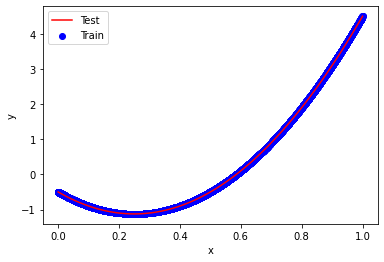

In [11]:
#visualize the data

plt.scatter(x_train, y_train, label = 'Train' , color='blue')
plt.plot(x_test, y_test, label="Test", color="red")
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()

#Define the Model
A basic, multilayer dense model with [Relu](en.wikipedia.org/wiki/Rectifier_(neural_networks)) activation functions is used. The output layer does not have an activation function in order to produce continuous output values.



In [15]:
#defined a sequential model

model = Sequential()
model.add(Dense(units=200, input_dim=1))
model.add(Activation('relu'))
model.add(Dense(units=20))
model.add(Activation('relu'))
model.add(Dense(units=1))


#Training

In [17]:
#train the model with the fit method
model.compile(loss='mean_squared_error', optimizer=Adam())
history = model.fit(x_train, y_train, batch_size=50, epochs=10, verbose=1, validation_data=(x_test, y_test))


Epoch 1/10
200/200 [==============================] - 1s 2ms/step - loss: 1.2477 - val_loss: 0.1096
Epoch 2/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0137
Epoch 3/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0083 - val_loss: 0.0061
Epoch 4/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0042 - val_loss: 0.0035
Epoch 5/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 6/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 7/10
200/200 [==============================] - 0s 1ms/step - loss: 8.2996e-04 - val_loss: 7.6547e-04
Epoch 8/10
200/200 [==============================] - 0s 1ms/step - loss: 5.0867e-04 - val_loss: 4.7474e-04
Epoch 9/10
200/200 [==============================] - 0s 1ms/step - loss: 3.2333e-04 - val_loss: 3.1189e-04
Epoch 10/10
200/200 [==============================] - 0s 2ms/step - loss: 2

#Model Loss
The loss is the difference between expected output (y_train) and model output. Lower loss values are better.



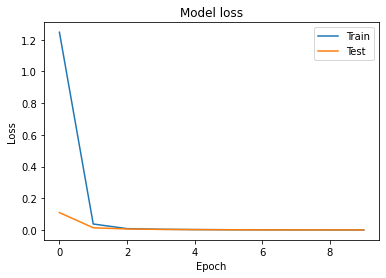

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='best')
plt.show()

#Predictions

In [21]:
#prediction
y_predictions = model.predict(x_test)

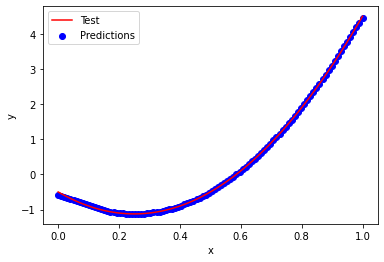

In [22]:
#plot the predicted result and compare with the ground truth

plt.scatter(x_test, y_predictions, label="Predictions", color='blue')
plt.plot(x_test, y_test, label="Test", color="red")
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()

#Save the model
The model structure and trained weights/biases can be saved to files. These can be reloaded later for prediction.



In [23]:
model_structure = model.to_json()
with open('model.json','w') as json_file:
  json_file.write(model_structure)
model.save_weights('weights.h5')

#Restore the train model

In [24]:
with open('model.json', 'r') as json_file:
  loaded_model_json = json_file.read()
restored_model = model_from_json(loaded_model_json)
restored_model.load_weights('weights.h5')

#Predictions
Make predictions using the restored model. It should produce the same results as the original model.



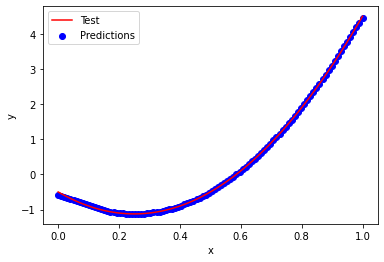

In [25]:
y_predictions = restored_model.predict(x_test, batch_size=1)

plt.scatter(x_test, y_predictions, label='Predictions', color='blue')
plt.plot(x_test, y_test, label='Test', color='red')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()